In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import  DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df=pd.read_csv('/content/Group_Exercise.csv')
df.head()

,"fBodyGyro-bandsEnergy()-49,56","fBodyGyro-bandsEnergy()-49,56.1","fBodyGyro-bandsEnergy()-49,56.2","fBodyAcc-bandsEnergy()-25,48","fBodyAcc-bandsEnergy()-25,48.1","fBodyAcc-bandsEnergy()-25,48.2",fBodyAccJerk-mad()-X,fBodyAcc-entropy()-Y,tBodyAcc-mad()-X,tGravityAcc-max()-Y,...,tGravityAccMag-arCoeff()3,"fBodyAccJerk-bandsEnergy()-49,64","fBodyAccJerk-bandsEnergy()-49,64.1","fBodyAccJerk-bandsEnergy()-49,64.2","angle(X,gravityMean)","fBodyGyro-bandsEnergy()-1,16","fBodyGyro-bandsEnergy()-1,16.1","fBodyGyro-bandsEnergy()-1,16.2","tBodyGyro-arCoeff()-X,4",tBodyGyro-mad()-Z
0,-0.999929,NaN,-0.999072,-0.999919,-0.999839,-0.999454,-0.993805,-0.904748,NaN,-0.161265,...,0.094832,-0.999485,-0.999596,-0.998681,-0.841247,-0.999863,-0.999619,-0.999952,-0.220317,-0.992362
1,-0.999784,-0.999980,-0.999961,-0.999946,-0.999804,-0.999822,NaN,-0.904748,-0.998807,-0.161343,...,0.311758,-0.999914,-0.999626,-0.999651,-0.844788,-0.999830,-0.999897,-0.999902,-0.140260,-0.989185
2,-0.999864,-0.999987,NaN,-0.999875,-0.999775,-0.999801,-0.987751,-0.815786,NaN,-0.163711,...,NaN,-0.999875,-0.999744,-0.999514,-0.848933,-0.999674,-0.999962,-0.999856,-0.113917,-0.985786
3,-0.999833,-0.999990,-0.999879,-0.999912,-0.999873,NaN,-0.989431,-0.870398,-0.997099,NaN,...,-0.000466,-0.999943,-0.999736,-0.999207,-0.848649,-0.999950,-0.999947,-0.999875,-0.165114,-0.989585
4,-0.999900,-0.999974,-0.999921,-0.999956,-0.999842,-0.999793,-0.996091,NaN,-0.998321,-0.166786,...,0.515562,-0.999958,-0.999568,NaN,-0.847865,-0.999865,-0.999946,-0.999864,-0.233271,-0.988163


In [3]:
#Handling Missing Values from the previous dataset
df.isnull().sum()
df_imputed=df.fillna(df.mean())
df_imputed.isnull().sum()
df_imputed.head()

# Handling outliers using the IQR method
df_iqr_cleaned = df_imputed.copy()

for column in df_iqr_cleaned.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df_iqr_cleaned[column].quantile(0.25)
    Q3 = df_iqr_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1  # Interquartile range

    # Defining lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Capping outliers to the lower and upper bounds
    df_iqr_cleaned[column] = df_iqr_cleaned[column].clip(lower=lower_bound, upper=upper_bound)

print("\nData after handling outliers (first 5 rows):")
print(df_iqr_cleaned.head())


Data after handling outliers (first 5 rows):
   fBodyGyro-bandsEnergy()-49,56  fBodyGyro-bandsEnergy()-49,56.1  \
0                      -0.999929                         2.054870   
1                      -0.999784                        -0.999980   
2                      -0.999864                        -0.999987   
3                      -0.999833                        -0.999990   
4                      -0.999900                        -0.999974   

   fBodyGyro-bandsEnergy()-49,56.2  fBodyAcc-bandsEnergy()-25,48  \
0                        -0.999072                     -0.999919   
1                        -0.999961                     -0.999946   
2                         1.673552                     -0.999875   
3                        -0.999879                     -0.999912   
4                        -0.999921                     -0.999956   

   fBodyAcc-bandsEnergy()-25,48.1  fBodyAcc-bandsEnergy()-25,48.2  \
0                       -0.999839                       -0.99

In [4]:
## Tree Models

''' 1. Decision Tree
Using Decision Tree  on the variable 'fBodyGyro-bandsEnergy()-49,56' column. Taking this feature as a target column'''

target_column = 'fBodyGyro-bandsEnergy()-49,56'
df['Target'] = (df[target_column] > df[target_column].median()).astype(int)

feature_column = 'fBodyGyro-bandsEnergy()-1,16'
X = df[[feature_column]]
y = df['Target']

df = df.dropna(subset=[feature_column])

# Spliting the dataset into training and testing sets for the Decision Tree Classifier.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training the Decision Tree Classifier by directly calling the DecisionTreeClassifier method
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_model.fit(X_train, y_train)

# Displaying the Decision Tree rules for all the columns
tree_rules = export_text(dt_model, feature_names=[feature_column])
print("Decision Tree Rules for the selected feature:")
print(tree_rules)

pred_dtree = dt_model.predict(X_test)

# Evaluate the model with accuracy
accuracy = accuracy_score(y_test, pred_dtree)
print("\nAccuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, pred_dtree))


Decision Tree Rules for the selected feature:
|--- fBodyGyro-bandsEnergy()-1,16 <= -0.96
|   |--- fBodyGyro-bandsEnergy()-1,16 <= -0.97
|   |   |--- fBodyGyro-bandsEnergy()-1,16 <= -1.00
|   |   |   |--- fBodyGyro-bandsEnergy()-1,16 <= -1.00
|   |   |   |   |--- fBodyGyro-bandsEnergy()-1,16 <= -1.00
|   |   |   |   |   |--- fBodyGyro-bandsEnergy()-1,16 <= -1.00
|   |   |   |   |   |   |--- fBodyGyro-bandsEnergy()-1,16 <= -1.00
|   |   |   |   |   |   |   |--- fBodyGyro-bandsEnergy()-1,16 <= -1.00
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- fBodyGyro-bandsEnergy()-1,16 >  -1.00
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- fBodyGyro-bandsEnergy()-1,16 >  -1.00
|   |   |   |   |   |   |   |--- fBodyGyro-bandsEnergy()-1,16 <= -1.00
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- fBodyGyro-bandsEnergy()-1,16 >  -1.00
|   |   |   |   |   |   |   |   |--- fBodyGyro-bandsEnergy()-1,16 <= -1.00
|   |

In [5]:
# Tree Models

# 2. Random Forest

# Using the same column we used in Decision Tree for Random Forest model to identify how other models differ from each other
target_column = 'fBodyGyro-bandsEnergy()-49,56'
df['Target'] = (df[target_column] > df[target_column].median()).astype(int)


feature_column = 'fBodyGyro-bandsEnergy()-1,16'
X = df[[feature_column]]
y = df['Target']

df = df.dropna(subset=[feature_column])

# Spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=10, random_state=42)
rf_model.fit(X_train, y_train)


rf_predictions = rf_model.predict(X_test)


accuracy = accuracy_score(y_test, rf_predictions)
classification_report_output = classification_report(y_test, rf_predictions)

# Displaying evaluation results
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report_output)


Accuracy: 0.7877237851662404

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       204
           1       0.77      0.79      0.78       187

    accuracy                           0.79       391
   macro avg       0.79      0.79      0.79       391
weighted avg       0.79      0.79      0.79       391



<ipython-input-5-1f1e0b93f790>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Target'] = (df[target_column] > df[target_column].median()).astype(int)


In [6]:
# Tree Models

#3. Gradient Boosted Trees

target_column = 'fBodyGyro-bandsEnergy()-49,56'
df['Target'] = (df[target_column] > df[target_column].median()).astype(int)


feature_column = 'fBodyGyro-bandsEnergy()-1,16'
X = df[[feature_column]]
y = df['Target']


df = df.dropna(subset=[feature_column])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


gbt_model = GradientBoostingClassifier(random_state=42)
gbt_model.fit(X_train, y_train)


gbt_predictions = gbt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, gbt_predictions)
classification_report_output = classification_report(y_test, gbt_predictions)

# Display evaluation results
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report_output)

Accuracy: 0.8132992327365729

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.74      0.80       204
           1       0.76      0.90      0.82       187

    accuracy                           0.81       391
   macro avg       0.82      0.82      0.81       391
weighted avg       0.83      0.81      0.81       391




Optimal number of neighbors for KNN: 14


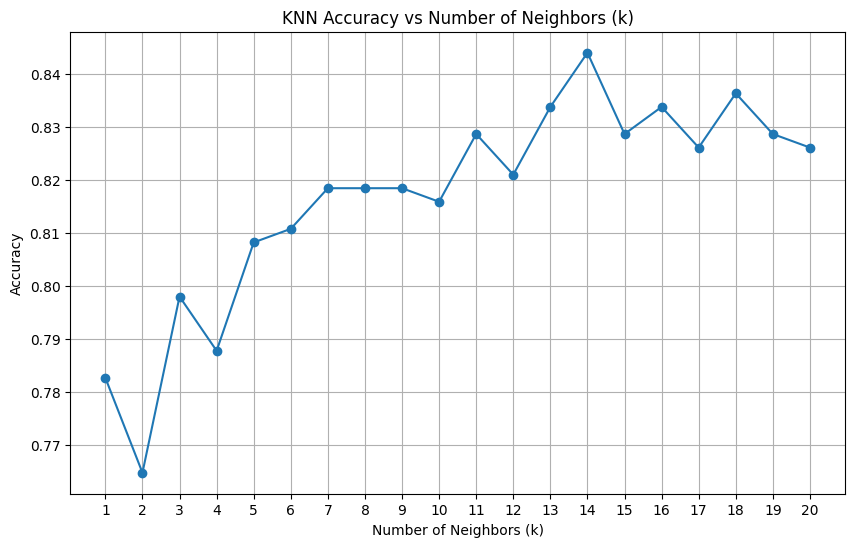

In [7]:
#KNN Model

# Use the K-Nearest Neighbors algorithm and identify the optimal value of kk by plotting its performance different against kk-values.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Determine the best-fit kk for KNN by visualizing performance metrics across varying kk-values.
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    predictions = knn_model.predict(X_test)
    accuracies.append(accuracy_score(y_test, predictions))

# Optimal k
optimal_neighbors = k_values[np.argmax(accuracies)]
print(f"\nOptimal number of neighbors for KNN: {optimal_neighbors}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title("KNN Accuracy vs Number of Neighbors (k)")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [8]:
## Optimal kk for KNN:
best_knn_model = KNeighborsClassifier(n_neighbors=optimal_neighbors)
best_knn_model.fit(X_train, y_train)
optimal_knn_pred = best_knn_model.predict(X_test)

print("\nOptimal KNN Performance:")
print(f"Accuracy: {accuracy_score(y_test, optimal_knn_pred):.2f}")
print(f"Precision: {precision_score(y_test, optimal_knn_pred):.2f}")
print(f"Recall: {recall_score(y_test, optimal_knn_pred):.2f}")
print(f"F1 Score: {f1_score(y_test, optimal_knn_pred):.2f}")




Optimal KNN Performance:
Accuracy: 0.84
Precision: 0.79
Recall: 0.93
F1 Score: 0.85
